In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import warnings
#warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter


In [2]:
df = pd.read_csv("cleaned_data.csv")
df = df.iloc[: , 1:]
df['order_date'] = pd.to_datetime(df['order_date'],format='%Y/%m/%d')
df['day_of_week'] =df.order_date.dt.day_of_week
df['month'] = df.order_date.dt.month
df

,order_date,customer_id,order_id,product_group,detailed_category,product_id,product_name,sku,qty_ordered,gross_revenue,net_revenue,day_of_week,month
0,2022-04-10,F125YX,7269150,Emma Others,Beds,12164,Emma Revor BSB 180x200 - BG Bedbase P2,EBDRV180200C32,1,282.85,212.66,6,4
1,2022-04-29,RY8A7X,7426895,Emma Mattress Protector V3,Accessories,7458,Emma Mattress Protector V3 200x200,ESSES200200AAC,1,96.75,68.13,4,4
2,2022-05-22,ZPUQOH,7588817,Emma Others,Accessories,8293,Emma Foam Pillow 80x40 V2,EPWFP080040AAB,1,54.40,41.01,6,5
3,2022-01-02,TSK3PM,6401748,Emma ONE Mattress medium,Basic Mattress,3138,Emma One Medium 090x200,EMAON090200CAC,2,362.02,304.21,6,1
4,2022-04-10,OC9N75,7262778,Emma Others,Basic Mattress,4570,Emma Dynamic Mattress-180 X 200 cm,EMADY180200AAA,1,441.75,332.12,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188840,2022-01-09,8UAXXO,6473544,Emma Original Mattress,Premium Mattress,8,Emma Original Mattress 200x200,EMAOR200200AAB,1,559.30,470.00,6,1
1188841,2021-10-04,OYQE9T,5470128,Emma Others,Accessories,8293,Emma Foam Pillow 80x40 V2,EPWFP080040AAB,1,48.64,40.87,0,10
1188842,2020-05-21,JD3TS0,1642192,Emma Foam Pillow,Accessories,189,Emma Pillow 80x40,EPWFP080040AAA,1,64.00,0.00,3,5
1188843,2022-05-23,0D23PM,7598188,Emma Others,Premium Mattress,8630,Emma Original Hybrid 090x200,EMAHE090200AAA,1,479.00,0.00,0,5


<AxesSubplot:xlabel='count', ylabel='product_group'>

Text(0.5, 0, 'Quantity Purchased')

Text(0, 0.5, 'Product Group')

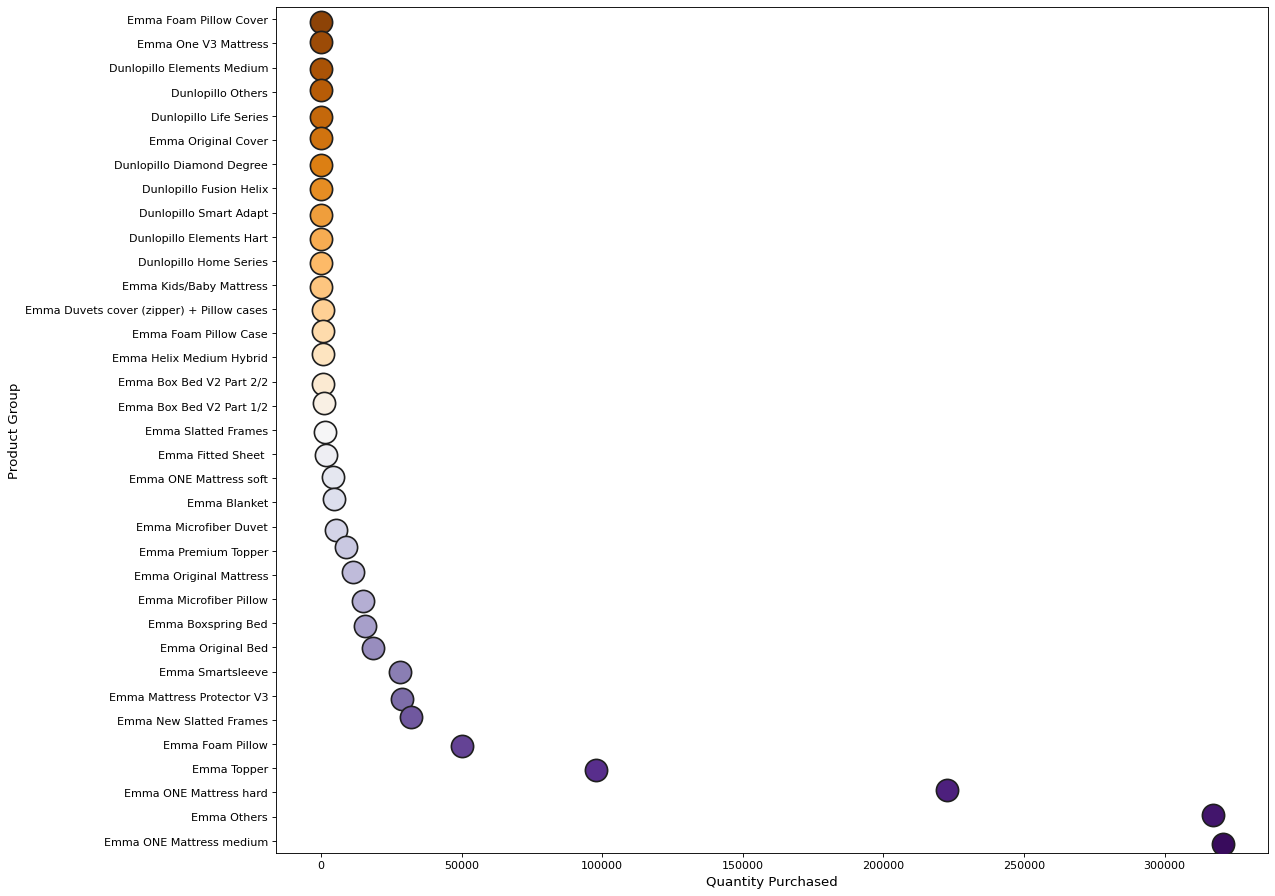

In [3]:
#Fig: Identifying frequently purchased products by product group
#Count occurence of unique products in product_group using Collections library
input = df['product_group']
c = Counter( input )

df_prodgroup = pd.DataFrame.from_dict(c, orient='index').reset_index()
df_prodgroup = df_prodgroup.rename(columns={'index':'product_group', 0:'count'})

#Plot df_prodgroup
fig, ax = plt.subplots(figsize=(16,14), dpi= 80)    
df_prodgroup_fig = df_prodgroup.sort_values("count")
sns.stripplot(x = df_prodgroup_fig['count'], y = df_prodgroup_fig.product_group, 
               palette="PuOr", jitter=0.15, size=20, ax=ax, linewidth=1.5)

#plt.title('Product Group by Number of Purchases, 1st January 2020 - 31st July 2022', fontsize=25)
plt.xlabel("Quantity Purchased", fontsize=12)
plt.ylabel("Product Group", fontsize=12)
plt.savefig("Quantity Purchased by Product Group.png", bbox_inches='tight')

,qty_ordered,occurence,occurence_log
0,200,1,0.0
1,103,1,0.0
2,81,1,0.0
3,72,1,0.0
4,68,1,0.0


<BarContainer object of 44 artists>

Text(0.5, 0, 'Frequency (Log2 applied)')

Text(0, 0.5, 'Quantity of items Purchased per Order')

<BarContainer object of 44 artists>

Text(0.5, 0, 'Absolute Frequency')

Text(0, 0.5, 'Quantity of items Purchased per Order')

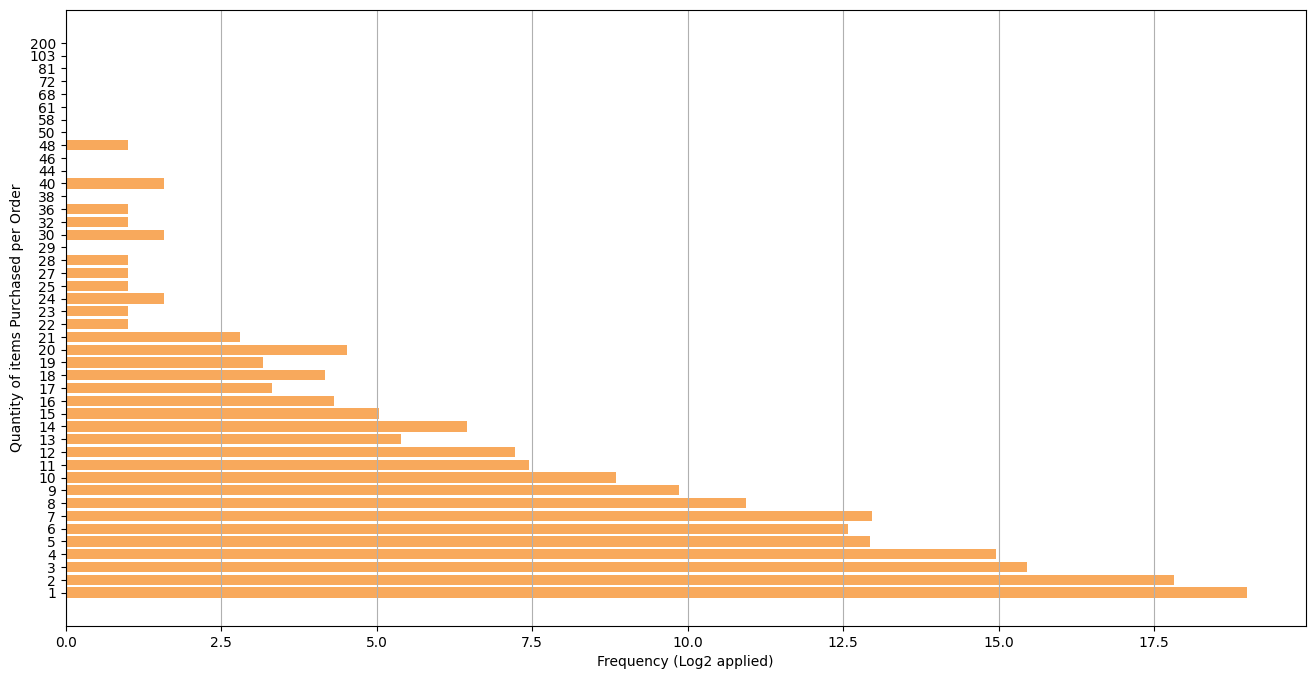

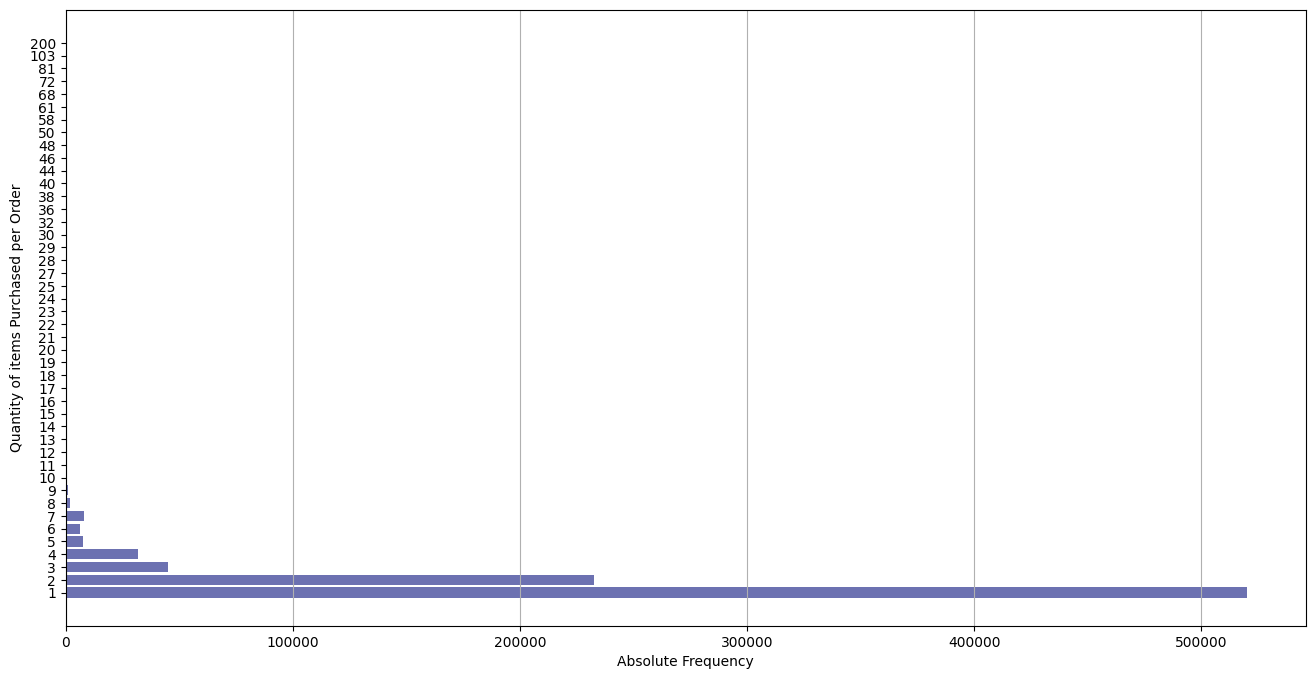

In [4]:
#Number of items per invoice distribution
plt.rcdefaults()
SMALL_SIZE = 10
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Make dataframe with each order ID having the number of items purchased
df_qty = df.groupby('order_id')['qty_ordered'].sum().sort_values(ascending=False).reset_index()
c = Counter( df_qty['qty_ordered'] )
df_qty = pd.DataFrame.from_dict(c, orient='index').reset_index()
df_qty = df_qty.rename(columns={'index':'qty_ordered', 0:'occurence'})
df_qty['occurence_log'] = np.log2(df_qty.occurence)
df_qty.head()

qty_ordered = df_qty['qty_ordered']
y_pos = np.arange(len(qty_ordered))

occurence = df_qty['occurence_log']
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_pos, occurence, align='center', color=['#f8a95c'])
ax.set_yticks(y_pos, labels=qty_ordered)
ax.invert_yaxis()  # labels read top-to-bottom
ax.grid(axis='x')
ax.set_xlabel('Frequency (Log2 applied)')
ax.set_ylabel('Quantity of items Purchased per Order')
#plt.savefig("Quantity of items Purchased per Order log2.png", bbox_inches='tight')
#ax.set_title('Log 2 Distribution of the quanity of items made per order')

occurence = df_qty['occurence']
fig, ax2 = plt.subplots(figsize=(16,8))
ax2.barh(y_pos, occurence, align='center',color=['#6c71b1'])
ax2.set_yticks(y_pos, labels=qty_ordered)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.grid(axis='x')
ax2.set_xlabel('Absolute Frequency')
ax2.set_ylabel('Quantity of items Purchased per Order')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
#plt.savefig("Quantity of items Purchased per Order absolute.png", bbox_inches='tight')
#ax2.set_title('Distribution of the quanity of items made per order')



In [10]:
df_qty
sum(df_qty.qty_ordered*df_qty.occurence)/sum(df_qty.occurence)

,qty_ordered,occurence,occurence_log
0,200,1,0.000000
1,103,1,0.000000
2,81,1,0.000000
3,72,1,0.000000
4,68,1,0.000000
5,61,1,0.000000
6,58,1,0.000000
7,50,1,0.000000
8,48,2,1.000000
9,46,1,0.000000


1.6568391069369772

,order_date,customer_id,order_id,product_group,detailed_category,product_id,product_name,sku,qty_ordered,gross_revenue,net_revenue,day_of_week,month
1042377,2022-02-14,RR6H2R,6842533,Emma ONE Mattress hard,Basic Mattress,3815,Emma One V3 Mattress 160x200 Hard,EMAON160200BAC,30,7975.5,6702.1,0,2


,order_id,gross_revenue,gross_log
0,7168407,24746.0,14.594908
1,5227271,10387.8,13.342603
2,4742028,10106.4,13.302982
3,2009192,9584.7,13.226518
4,6842533,7975.5,12.961359


(array([1.72732266e-03, 2.56714019e-04, 2.31857769e-05, 1.19437585e-05,
        1.17665514e-06, 1.27589112e-07, 9.92359759e-08, 2.83531360e-08,
        7.08828399e-09, 1.65393293e-08, 7.08828399e-09, 2.36276133e-09,
        0.00000000e+00, 7.08828399e-09, 7.08828399e-09, 4.72552266e-09,
        7.08828399e-09, 0.00000000e+00, 0.00000000e+00, 2.36276133e-09,
        4.72552266e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.36276133e-09]),
 array([1.69000000e+00, 4.96576200e+02, 9.91462400e+02, 1.48634860e+03,
        1.98123480e+03

Text(359.7916318937981, 0.0016323199154091167, 'Mean: 327.08')

Text(0, 0.5, 'Probability Density')

Text(0.5, 0, 'Gross Revenue (absolute value)')

(array([4.22498822e-06, 3.80248939e-05, 0.00000000e+00, 5.91498350e-05,
        5.06998586e-05, 0.00000000e+00, 1.68999529e-05, 2.95749175e-05,
        1.26749646e-05, 2.11249411e-05, 3.37999057e-05, 1.81674493e-04,
        1.39424611e-04, 1.30974635e-04, 3.36731561e-03, 7.94720283e-03,
        6.44310703e-03, 1.17378623e-01, 1.70495174e-01, 2.08967917e-02,
        2.84552956e-02, 8.43941396e-02, 8.39674158e-02, 1.57524461e-01,
        5.24274563e-01, 2.30266083e-01, 3.43905591e-01, 6.43499505e-01,
        4.82451404e-01, 2.76318454e-01, 1.99689843e-01, 1.01978541e-01,
        5.52374959e-02, 3.00565662e-02, 1.51930576e-02, 1.63338044e-02,
        1.06385203e-02, 1.25904649e-03, 2.40824328e-04, 1.98574446e-04,
        2.95749175e-05, 4.22498822e-05, 4.22498822e-06, 3.37999057e-05,
        1.26749646e-05, 1.26749646e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.22498822e-06]),
 array([ 0.75702325,  1.03378094,  1.31053863,  1.58729632,  1.864054  ,
         2.14081169, 

Text(0, 0.5, 'Probability Density')

Text(0.5, 0, 'Gross Revenue (log2 applied)')

Text(5.673996325111173, 0.05, '5th')

Text(7.354621527098599, 0.05, '25th')

Text(8.123138369691294, 0.05, '50th')

Text(8.524779216959516, 0.05, '75th')

Text(9.321211111832328, 0.05, '95th')

Text(8.832442653736193, 0.6081070323770094, 'Mean: 8.03')

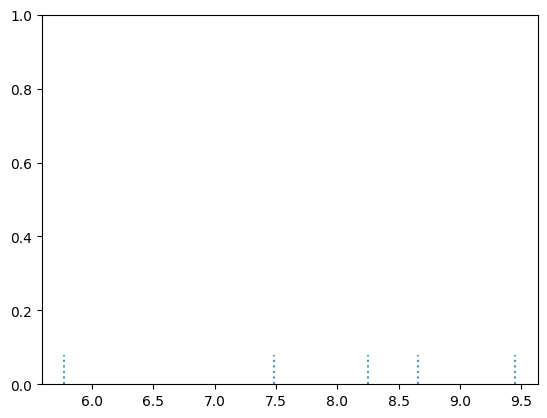

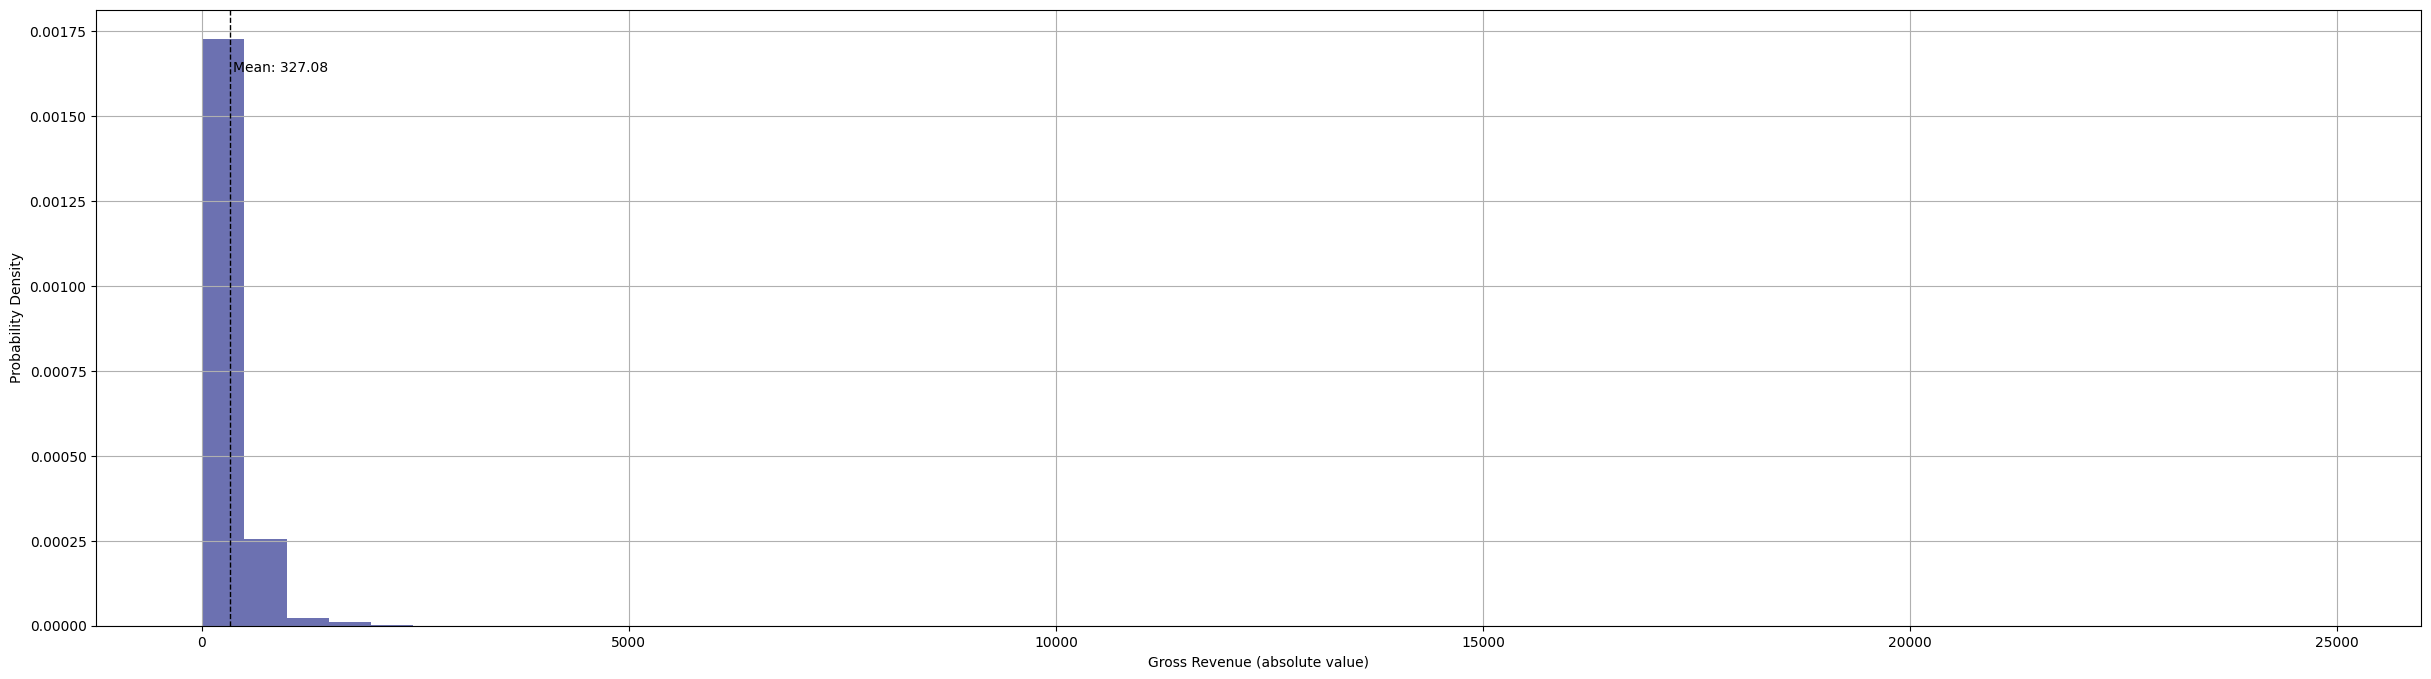

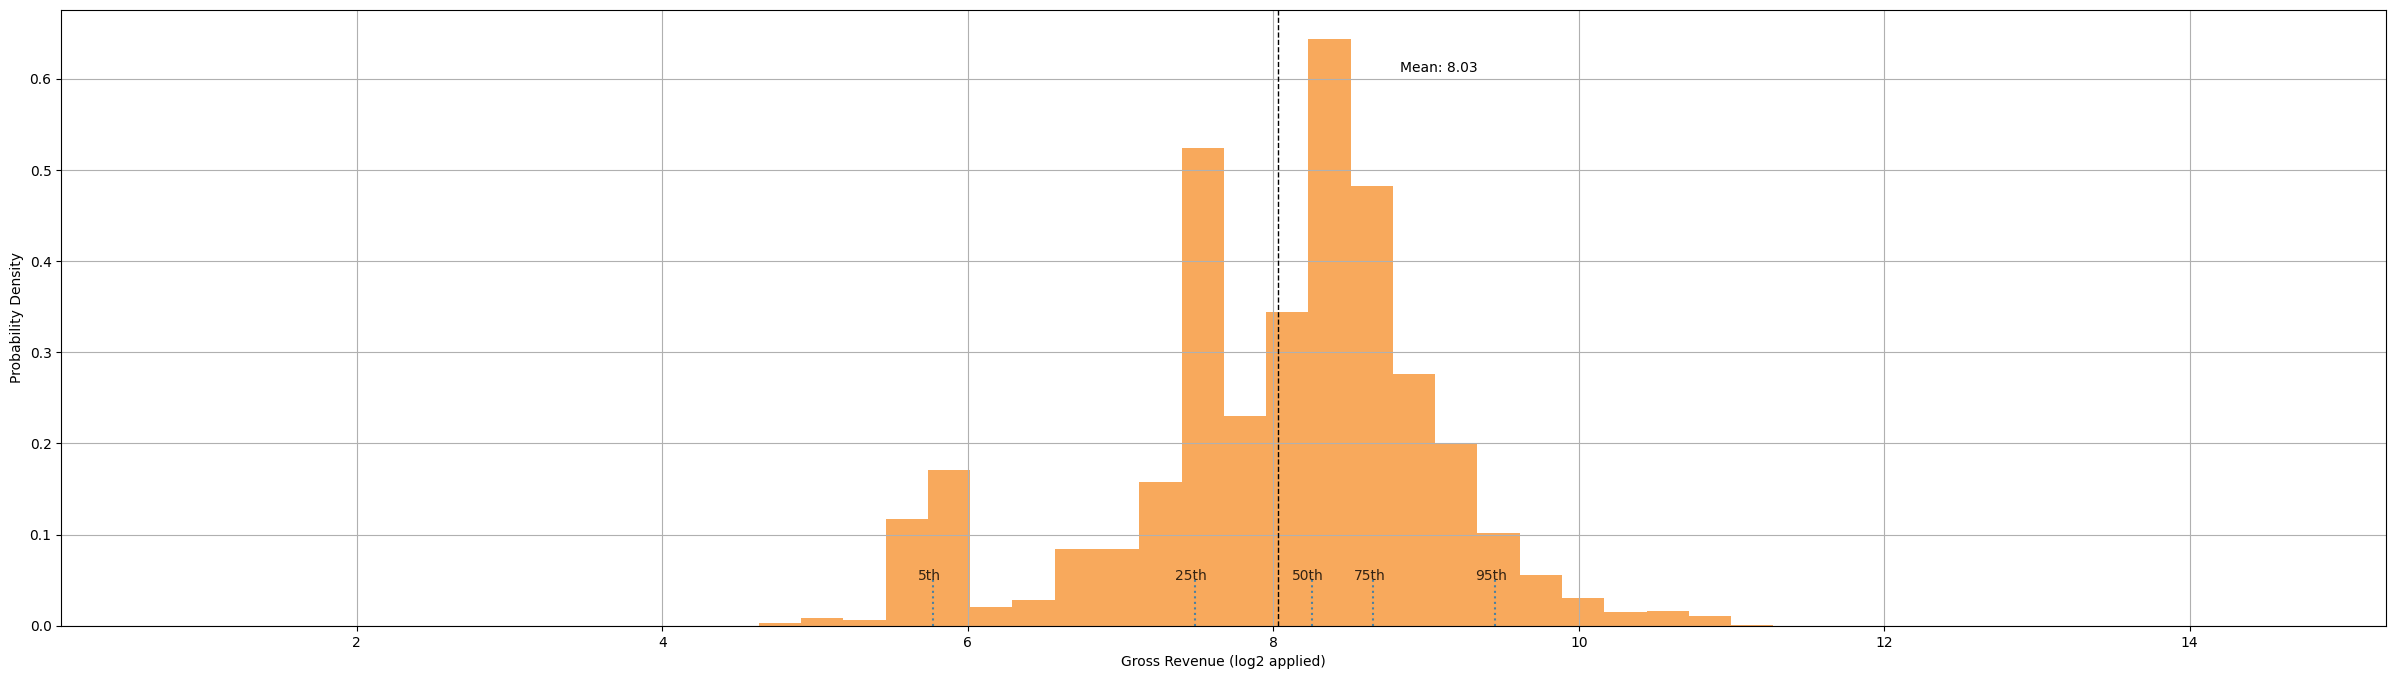

In [28]:
#Basket value distribution
#Histogram
#X = value (gross_revenue)
#%matplotlib inline

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = x.quantile(0.05), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.8, 0.08], [quant_25, 0.8, 0.08], [quant_50, 0.8, 0.08],  [quant_75, 0.8, 0.08], [quant_95, 0.8, 0.08]]

# Plot the lines with a loop
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

df[df['order_id']==6842533]
#Make dataframe with each order ID having the number of iteams purchased
df_rev = df.groupby('order_id')['gross_revenue'].sum().sort_values(ascending=False).reset_index()
df_rev['gross_log'] = np.log2(df_rev.gross_revenue)
df_rev.head()

x = df_rev['gross_revenue']
fig, ax3 = plt.subplots(figsize=(30,8))
plt.hist(x, color=['#6c71b1'], density=True, bins=50)  # density=False would make counts
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.grid(axis="both")
plt.ylabel('Probability Density')
plt.xlabel('Gross Revenue (absolute value)')
plt.savefig("Basket Value distribution absolute.png", bbox_inches='tight')

x = df_rev['gross_log']
fig, ax4 = plt.subplots(figsize=(30,8))
plt.hist(x, color=['#f8a95c'], density=True, bins=50)  # density=False would make counts
plt.grid(axis="both")
plt.ylabel('Probability Density')
plt.xlabel('Gross Revenue (log2 applied)')
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
plt.text(quant_5-.1, 0.05, "5th", size = 10, alpha = 0.8)
plt.text(quant_25-.13, 0.05, "25th", size = 10, alpha = 0.8)
plt.text(quant_50-.13, 0.05, "50th", size = 10, alpha = 0.8)
plt.text(quant_75-.13, 0.05, "75th", size = 10, alpha = 0.8)
plt.text(quant_95-.13, 0.05, "95th", size = 10, alpha =0.8)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
#x.plot(kind = "kde")
plt.savefig("Basket Value distribution log2.png", bbox_inches='tight')

In [6]:
#Number of transactions by month - Heatmap
df_month = df.groupby([df.order_date.dt.year,df.month])['gross_revenue'].sum().reset_index()
df_month = df_month.merge(df.groupby([df.order_date.dt.year,df.month])['order_id'].sum().reset_index())
df_month.columns=['Year','Month','Monthly_Revenue','Monthly_Orders']
df_month



,Year,Month,Monthly_Revenue,Monthly_Orders
0,2020,1,3.589820e+06,16550192262
1,2020,2,3.028238e+06,15758628251
2,2020,3,3.360845e+06,17161370562
3,2020,4,6.237773e+06,40287019693
4,2020,5,5.921672e+06,40546820111
5,2020,6,5.891460e+06,44216533431
6,2020,7,5.513068e+06,44686590968
7,2020,8,5.953263e+06,53260965601
8,2020,9,6.729141e+06,63996544901
9,2020,10,7.276257e+06,76258669519


array([[ 3589820.42000033,  3028237.74000045,  3360845.44000039,
         6237773.18999953,  5921672.28000006,  5891459.68999989,
         5513068.20000011,  5953262.78999997,  6729141.43999949,
         7276256.69999954, 15747089.40998952,  3865650.80000039],
       [ 8303656.52999795,  5888469.86999982, 11767644.63999728,
        10171103.01999857,  9229862.51999734,  6649574.03999992,
         9085026.52999933, 11366410.18999554, 10604456.70999951,
         9810562.88000195, 19171973.70999354,  6722270.18000023],
       [14527307.05000004, 10669713.65000015, 11476748.1600009 ,
        20619543.18999576,  9962695.10000064,  9215940.12999966,
        11368982.59999989,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ]])

<AxesSubplot:ylabel='None'>

Text(0.5, 25.722222222222214, 'Month')

Text(95.72222222222221, 0.5, 'Year')

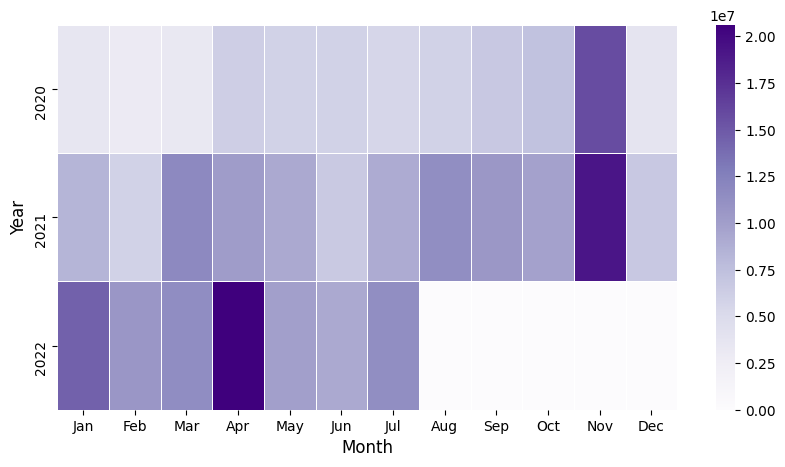

In [67]:
monthsOfYear = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
years = ['2020','2021','2022']

#Obtain shaped data
shaped_array = np.concatenate((df_month['Monthly_Revenue'].to_numpy(),[0,0,0,0,0]), axis=None).reshape(3,12)
shaped_array
df_day_month = pd.DataFrame(shaped_array, columns=monthsOfYear, index=[years])


# Set figure size
fig, ax = plt.subplots(figsize=(10,5))

# Use seaborn library to create heatmap of df_crash
sns.heatmap(df_day_month, xticklabels=True, yticklabels=True, square=False, linewidths=0.6, cmap='Purples')

# Use matplotlib library to label axis & provide title
#plt.title("Gross Revenue for each day of the week per month", fontsize = 16)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Year", fontsize = 12)
plt.savefig("Gross revenue by month and year.png", bbox_inches='tight')

<AxesSubplot:ylabel='None'>

Text(0.5, 80.7222222222222, 'Days of the Week')

Text(95.72222222222221, 0.5, 'Month')

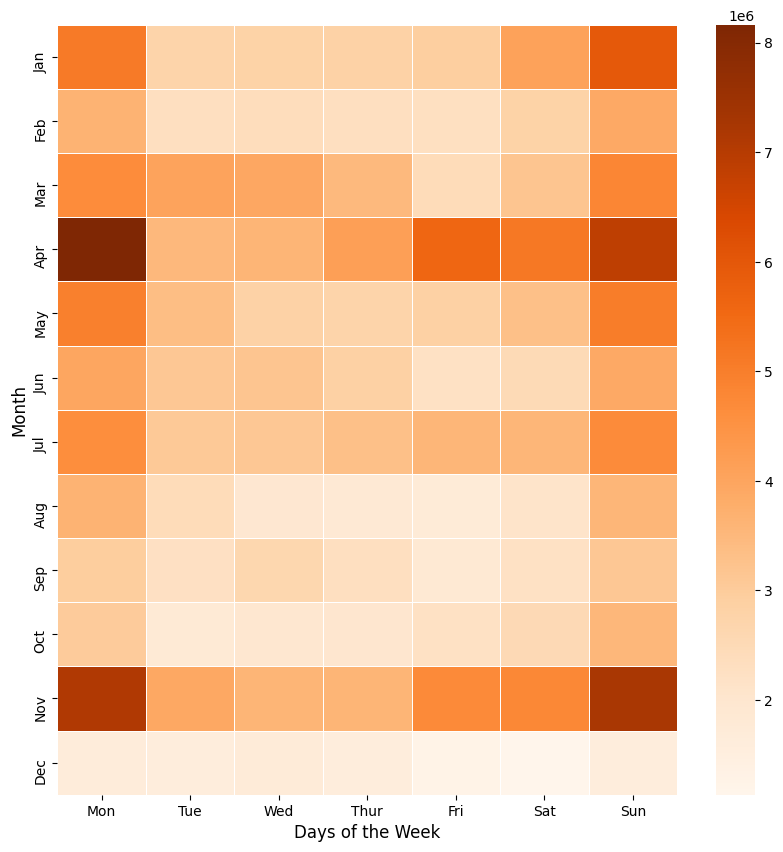

In [44]:
monthsOfYear = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weekDays =['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

#Obtain shaped data
df_day_month = df.groupby([df.month,df.day_of_week])['gross_revenue'].sum().reset_index()
shaped_array = df_day_month['gross_revenue'].to_numpy().reshape(12,7)
df_day_month = pd.DataFrame(shaped_array, columns=weekDays, index=[monthsOfYear])

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))

# Use seaborn library to create heatmap of df_crash
sns.heatmap(df_day_month, xticklabels=True, yticklabels=True, square=False, linewidths=0.6, cmap='Oranges')

# Use matplotlib library to label axis & provide title
#plt.title("Gross Revenue for each day of the week per month", fontsize = 16)
plt.xlabel("Days of the Week", fontsize = 12)
plt.ylabel("Month", fontsize = 12)
plt.savefig("Gross revenue by month and day.png", bbox_inches='tight')